# Exploratory Data Analysis (EDA)

In [2]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 2.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration 

In [15]:
df = pd.read_csv("HR_data.csv")

In [16]:
cols = df.columns.tolist()
cols = cols[7:] + cols[:7]
df = df[cols]
df.head()

,promotion_last_5years,Department,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,0,sales,low,0.38,0.53,2,157,3,0,1
1,0,sales,medium,0.80,0.86,5,262,6,0,1
2,0,sales,medium,0.11,0.88,7,272,4,0,1
3,0,sales,low,0.72,0.87,5,223,5,0,1
4,0,sales,low,0.37,0.52,2,159,3,0,1


In [26]:
df.dtypes

promotion_last_5years      int64
Department                object
salary                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
dtype: object

In [25]:
df.describe()

,promotion_last_5years,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.021268,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083
std,0.144281,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [21]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [22]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

## Data visualization

### Feature `left`

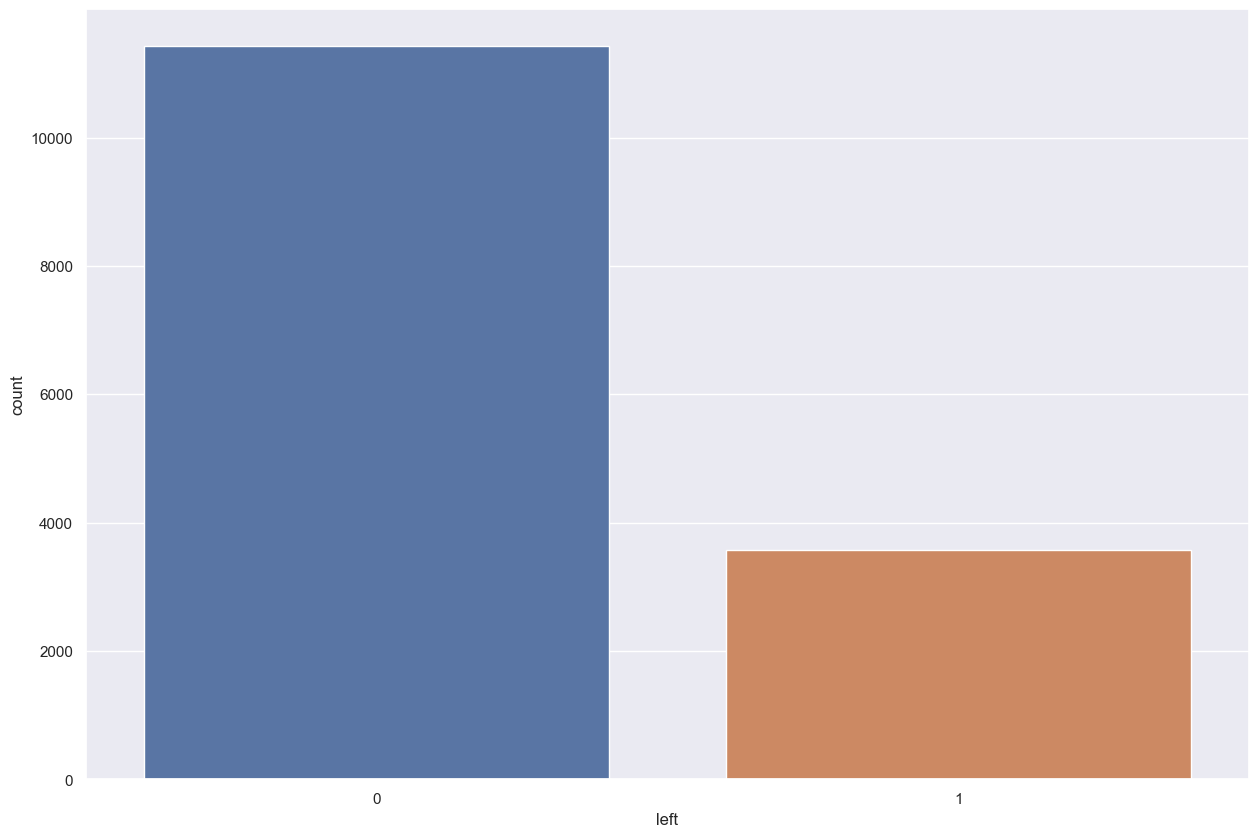

In [53]:
# check total employee range based on target column that left
sns.countplot(x='left', data=df)
plt.show()

- The number of people left is fewer than the number of retained one.
- The rate is imbalance.

### Feature `salary`

<AxesSubplot:xlabel='salary', ylabel='count'>

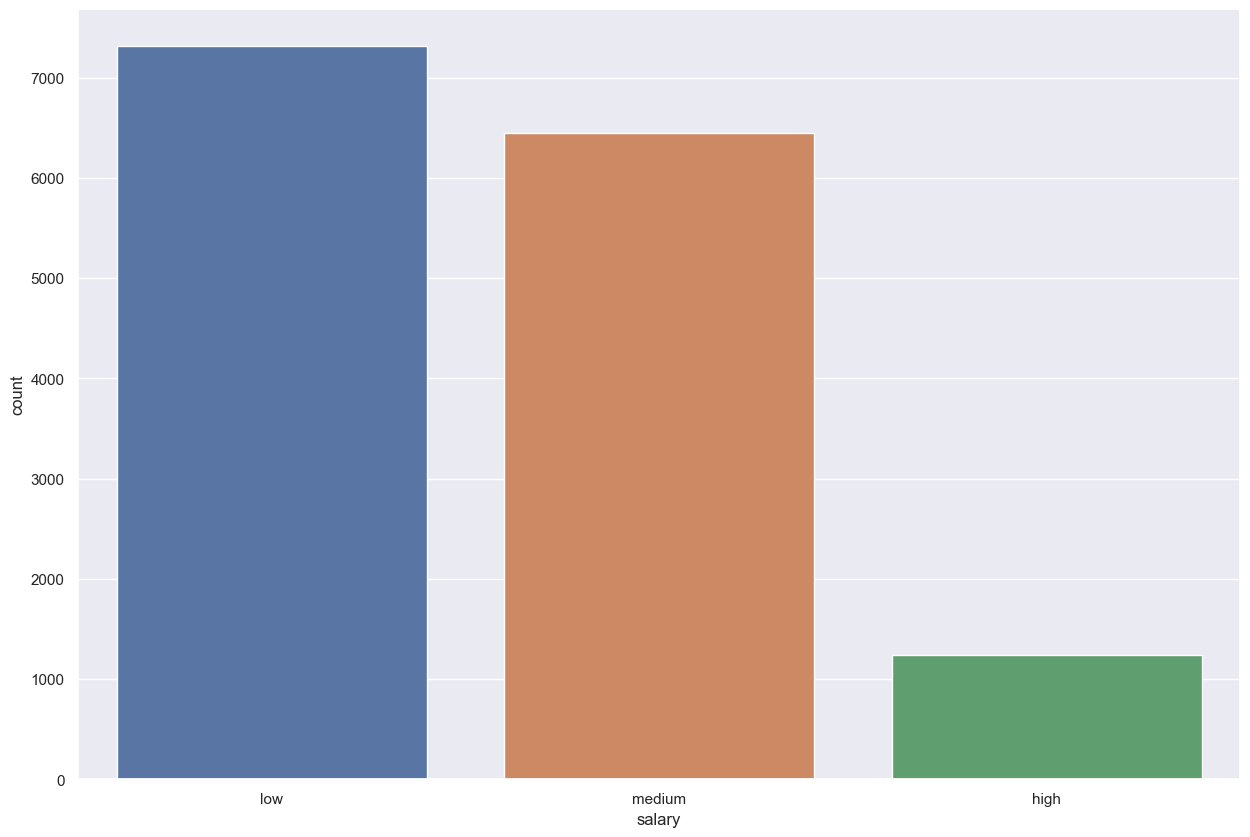

In [52]:
sns.countplot(x='salary', data=df)

- As the level of the salary increases, the number of people achieve this level decreases as expected.

### Feature `left` vs feature `salary`

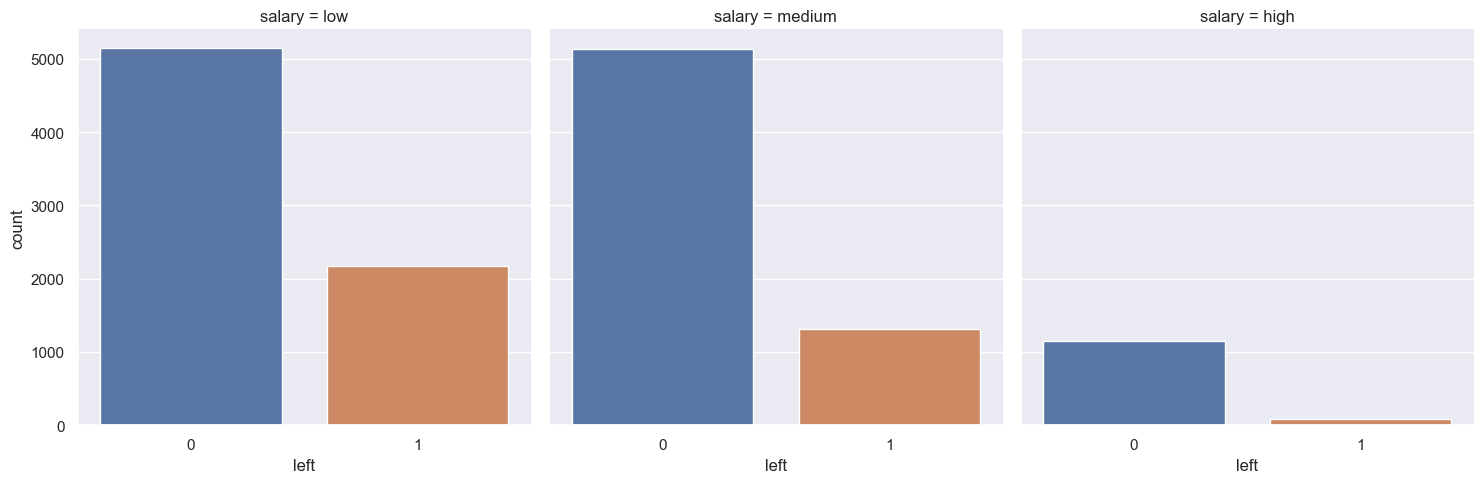

In [32]:
sns.catplot(x='left', col='salary', kind='count', data=df)

- In any levels of salary, the number of people left the job is still fewer than the number of people stay.
- The difference between left and stay increase as the salary increase. 

### Feature `Department`

<AxesSubplot:xlabel='Department', ylabel='count'>

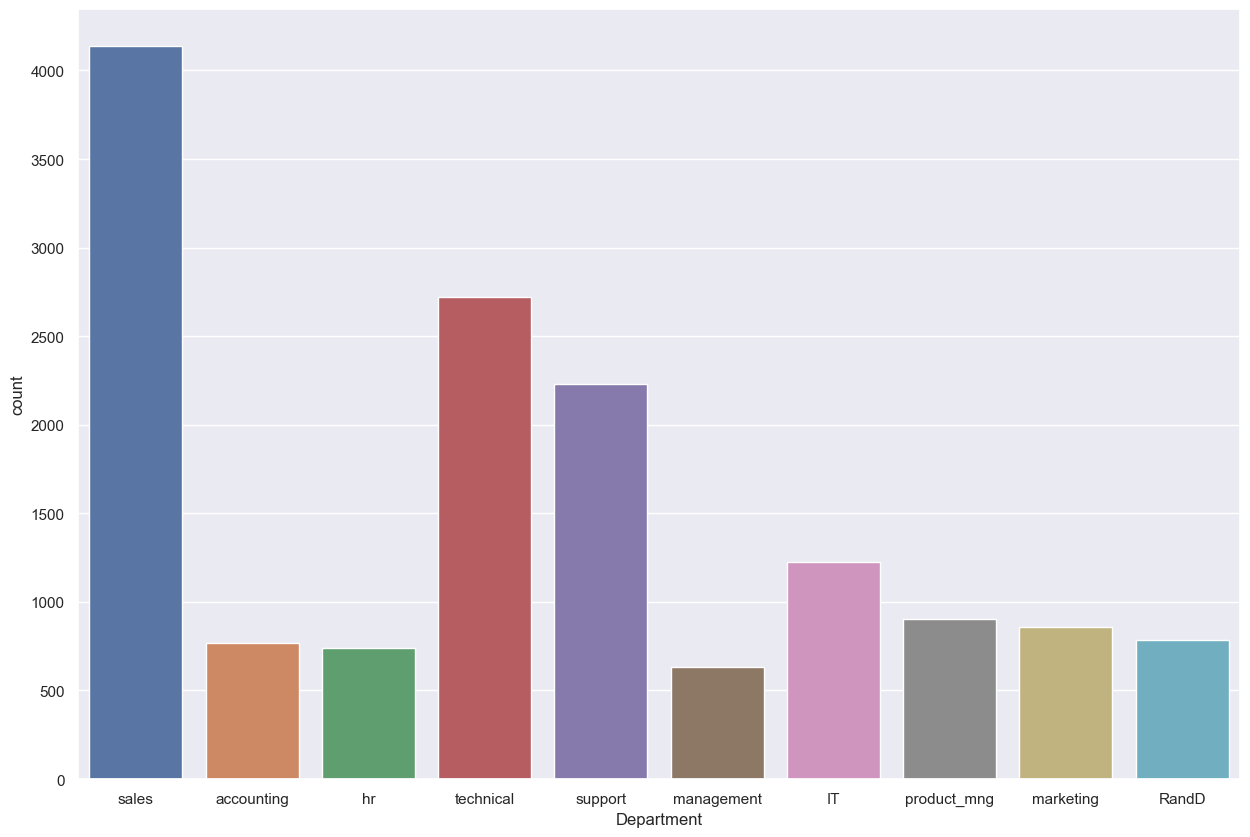

In [54]:
sns.countplot(x='Department', data=df)

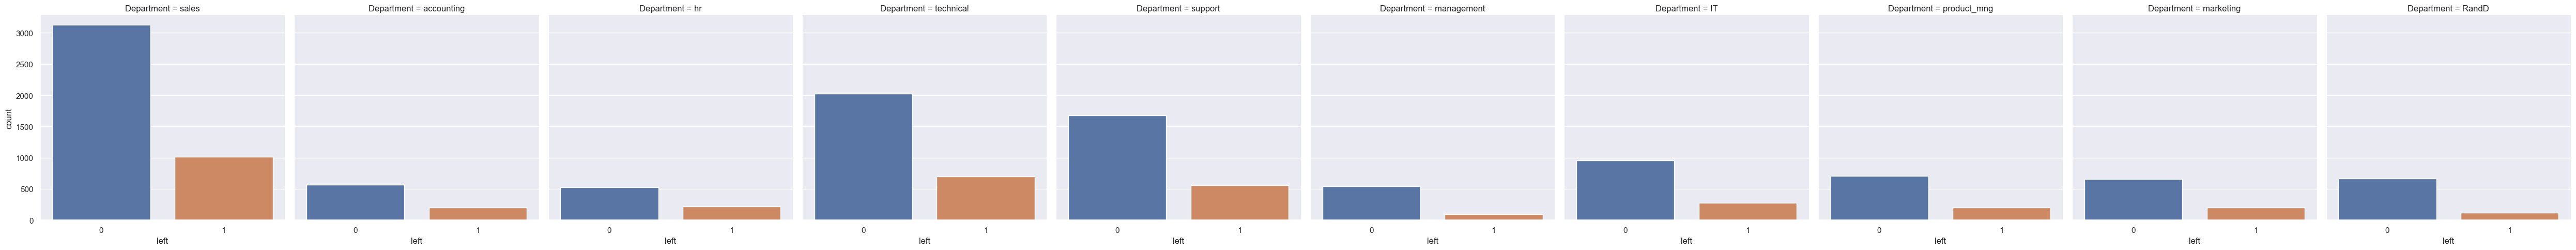

In [56]:
sns.catplot(x='left', col='Department', kind='count', data=df)

### Feature `promotion_last_5years`

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

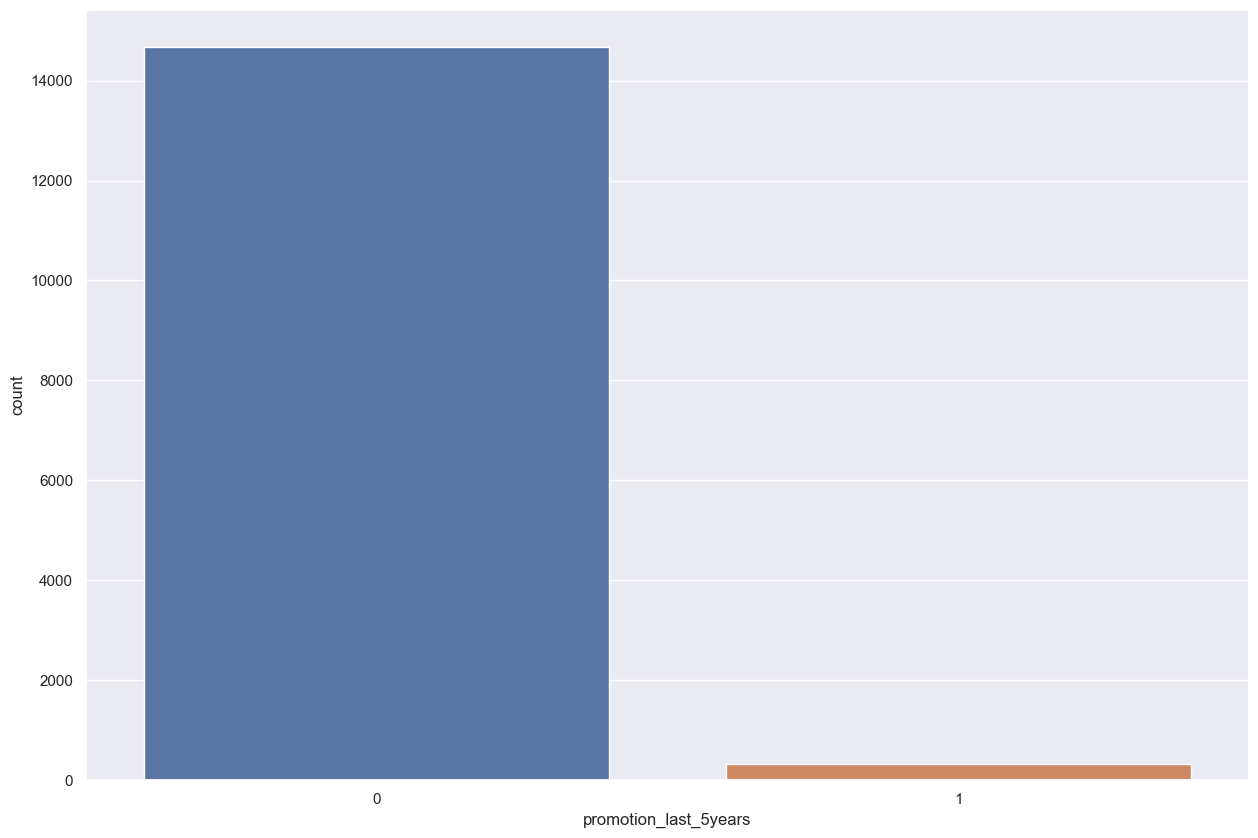

In [33]:
sns.countplot(x='promotion_last_5years', data=df)

- The number of employees getting promotion in the last 5 years is much fewer than that of the one who not.

### Feature `left` vs feature `promotion_last_5years`

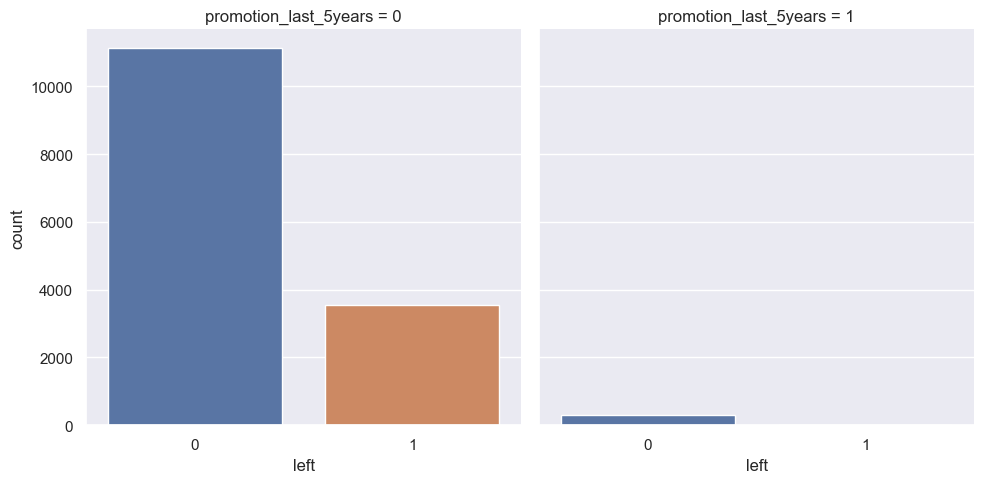

In [34]:
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df)

- Almost no one getting promtion left the jobs.
- The non-promoted employee left more.

### Feature `Work_accident`

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

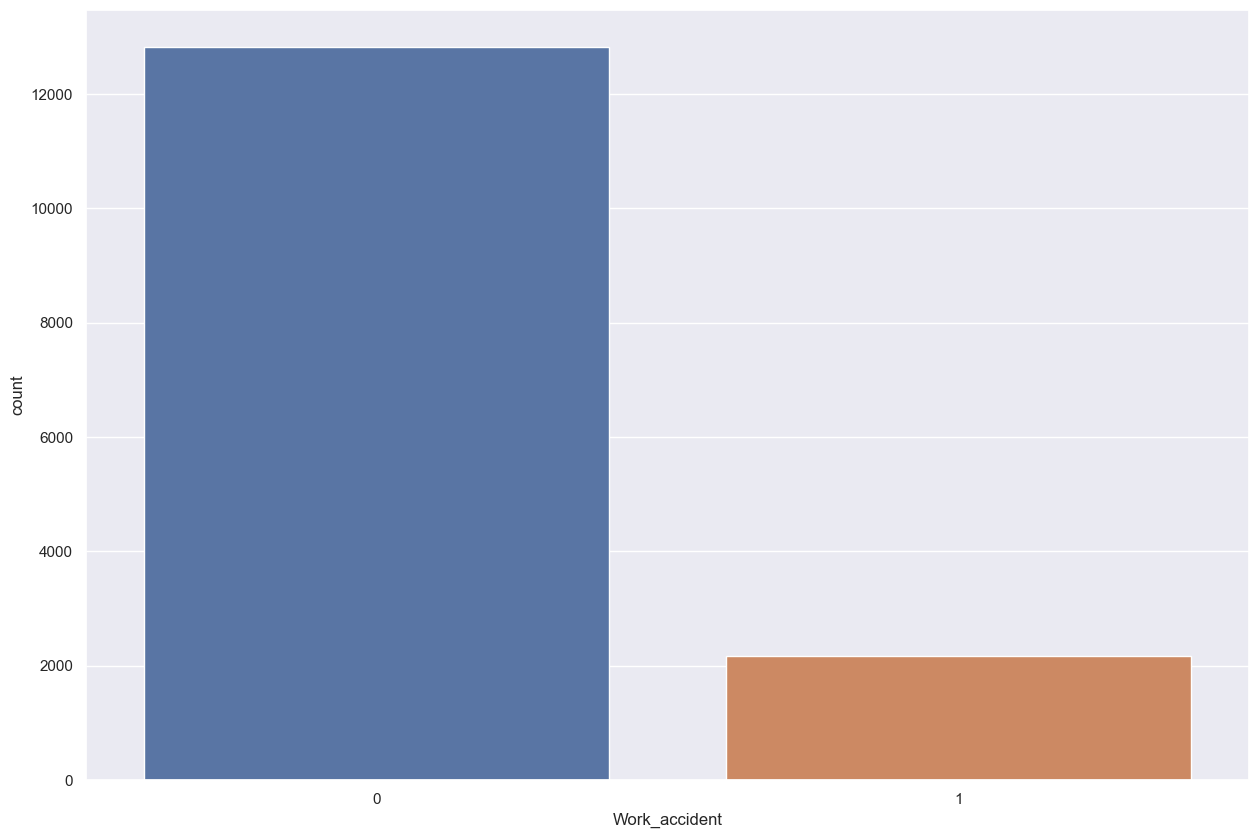

In [35]:
sns.countplot(x='Work_accident', data=df)

- The rate of employees encounter work accident is less.

### Feature `left` vs feature `Work_accident`

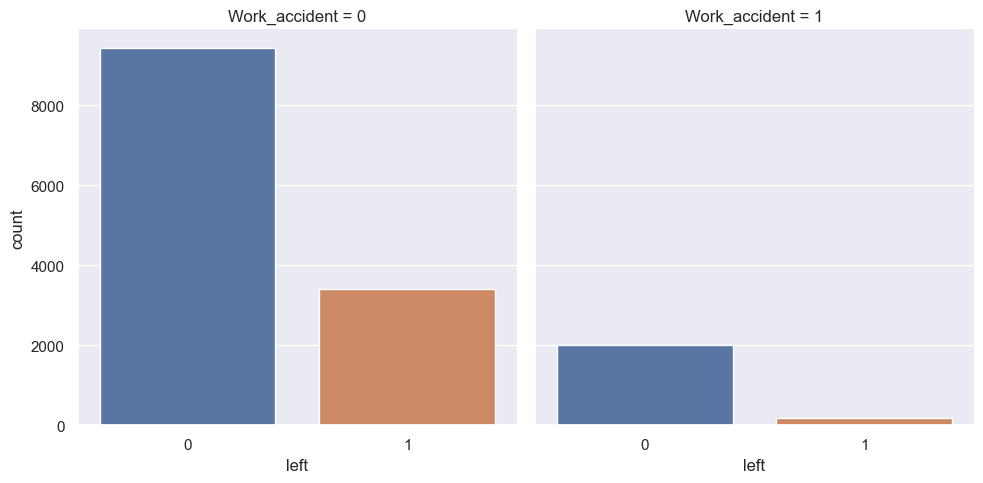

In [36]:
sns.catplot(x='left', col='Work_accident', kind='count', data=df)

- Very small rate of people who left the job and encounter work accident or most of the one who left the job is safe from work accident.

### Feature `satisfaction_level`

C:\Users\Rachel\AppData\Local\Temp\ipykernel_3472\667929916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

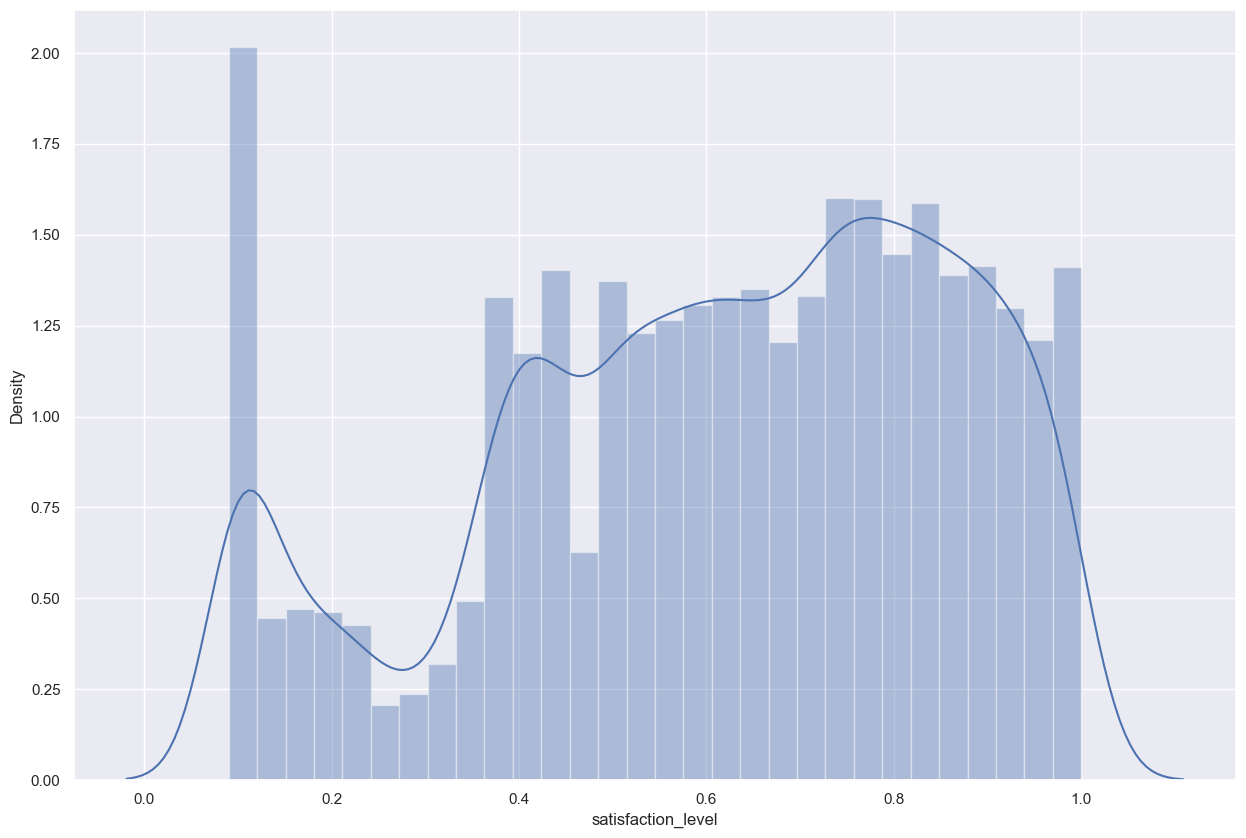

In [40]:
sns.distplot(df['satisfaction_level'])

- Satisfaction level distribute from 0.1 to 1, mostly populated from 0.4 to 1.0 but has the significantly high density at 0.1.

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

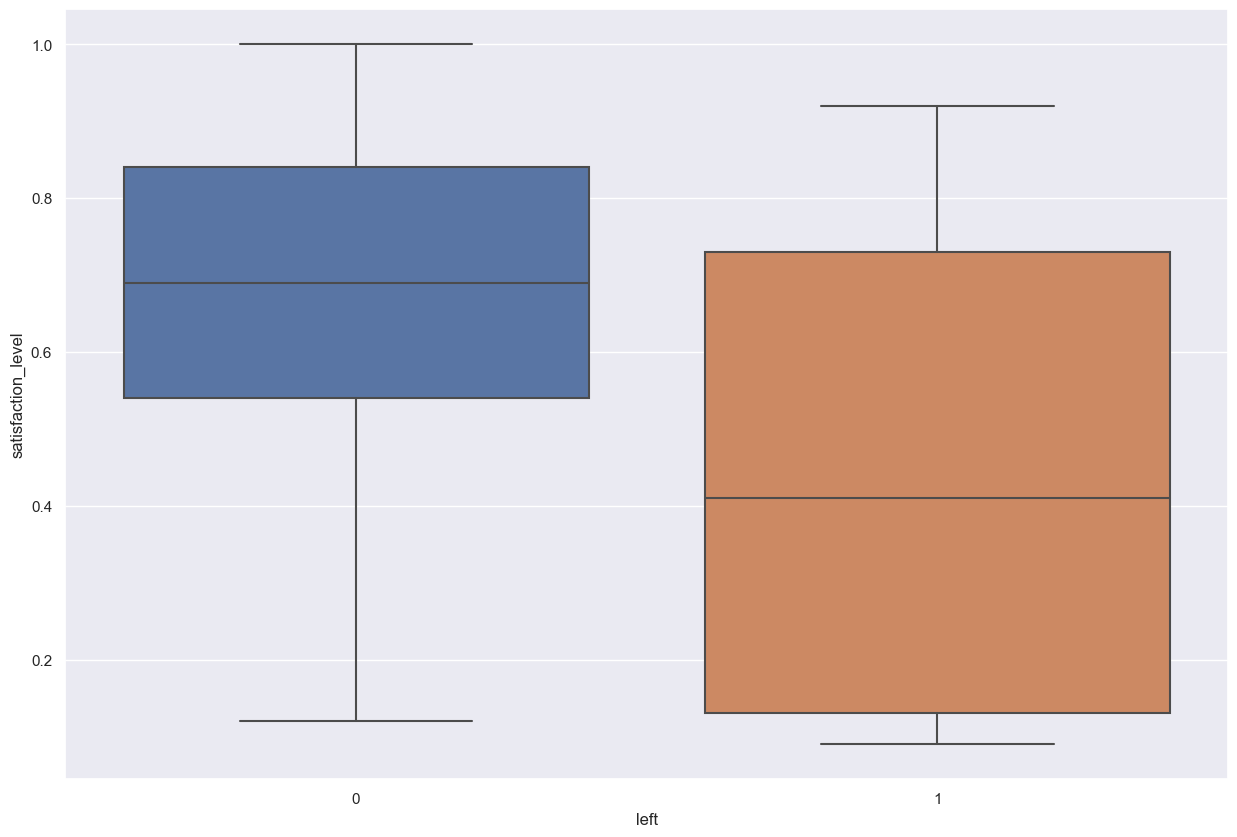

In [41]:
# box plot to show distributions with respect to categories
sns.boxplot(x='left', y='satisfaction_level', data=df)

- Employee left having wider range satisfaction level: from 0.1 to 0.7 but lower than the satisfaction range of the one who stay: from 0.6 to 0.8

C:\Users\Rachel\AppData\Local\Temp\ipykernel_3472\487619780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_project'])


<AxesSubplot:xlabel='number_project', ylabel='Density'>

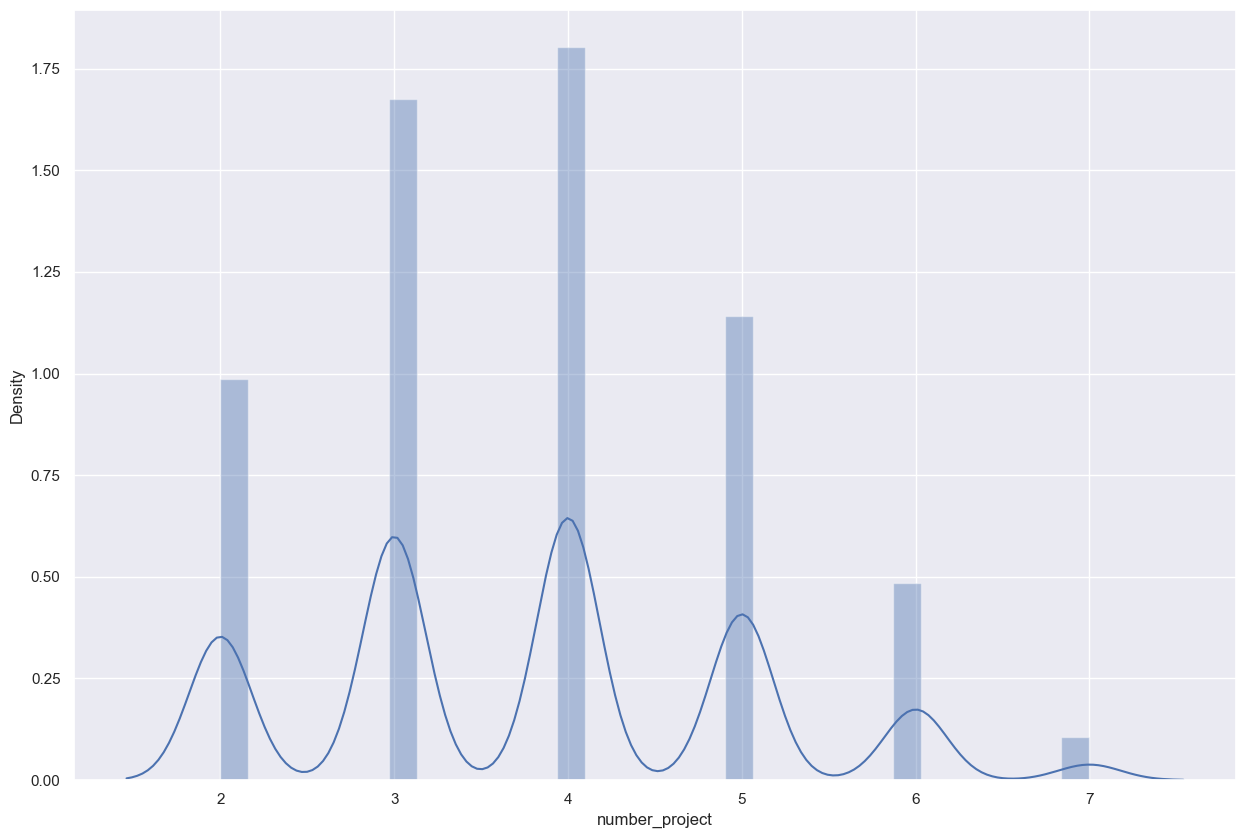

In [42]:
sns.distplot(df['number_project'])

- The distribution of number_project is from 2 to 7 where the peak is at 4.

<AxesSubplot:xlabel='left', ylabel='number_project'>

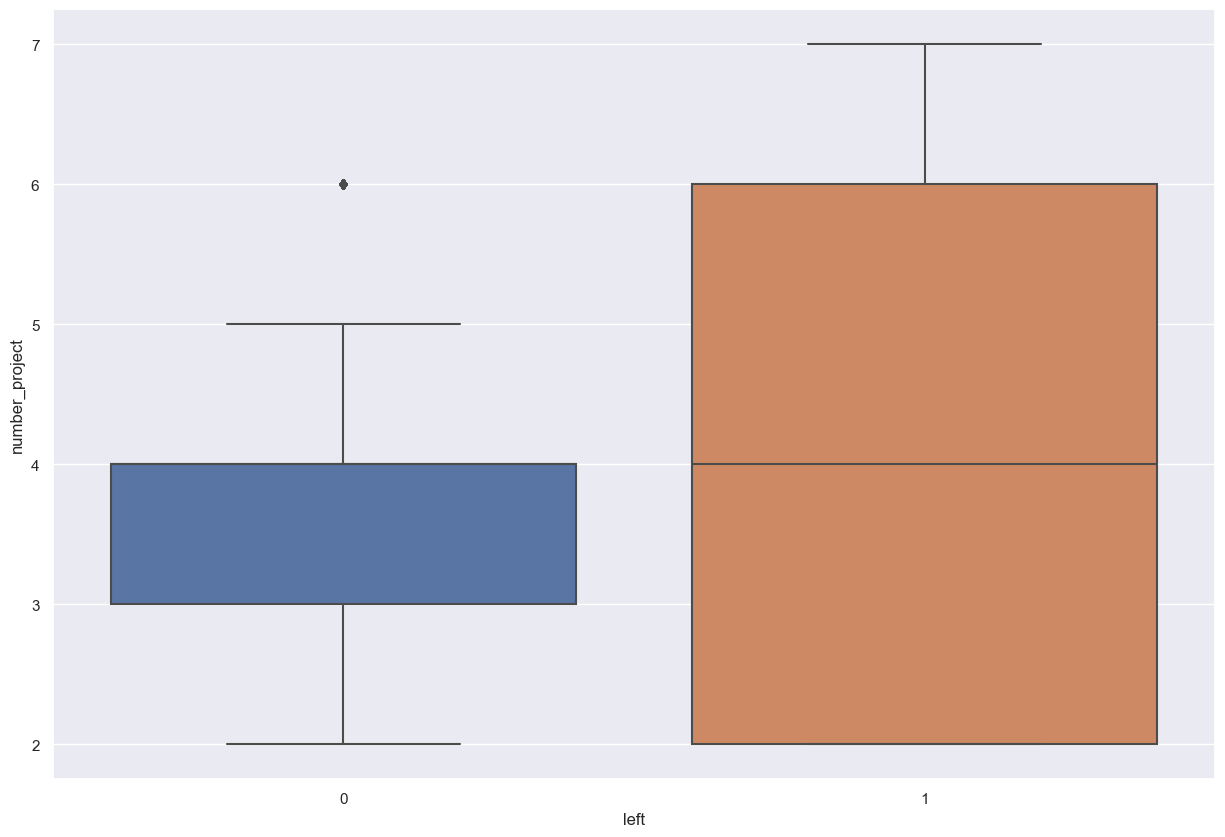

In [43]:
sns.boxplot(x='left', y='number_project', data=df)

- The retained employees having about 3 or 4 projects while the left one having worked on 2 to 6 projects.

### Feature `last_evaluation`

C:\Users\Rachel\AppData\Local\Temp\ipykernel_3472\3558093561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

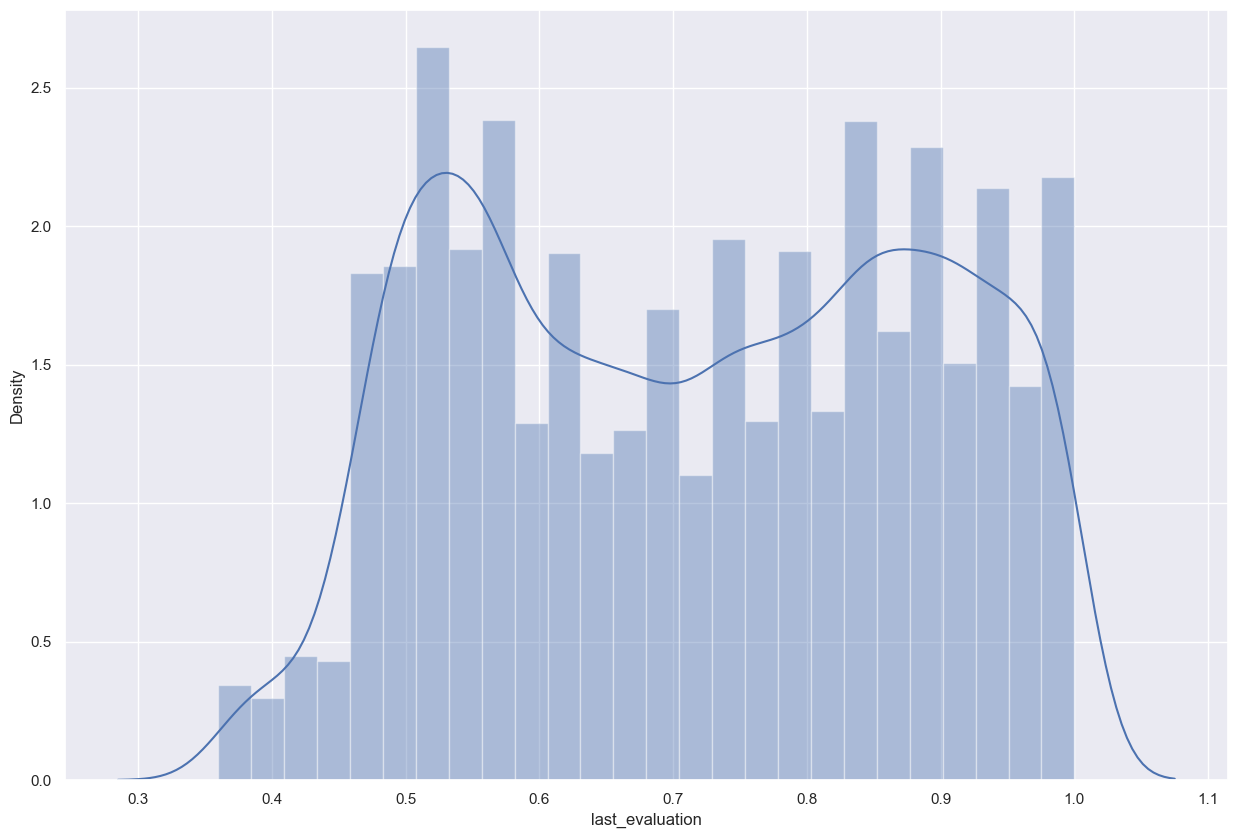

In [44]:
sns.distplot(df['last_evaluation'])

- The distribution of last_evaluation is from 0.35 to 1 and mostly from 0.5 to 1.0.

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

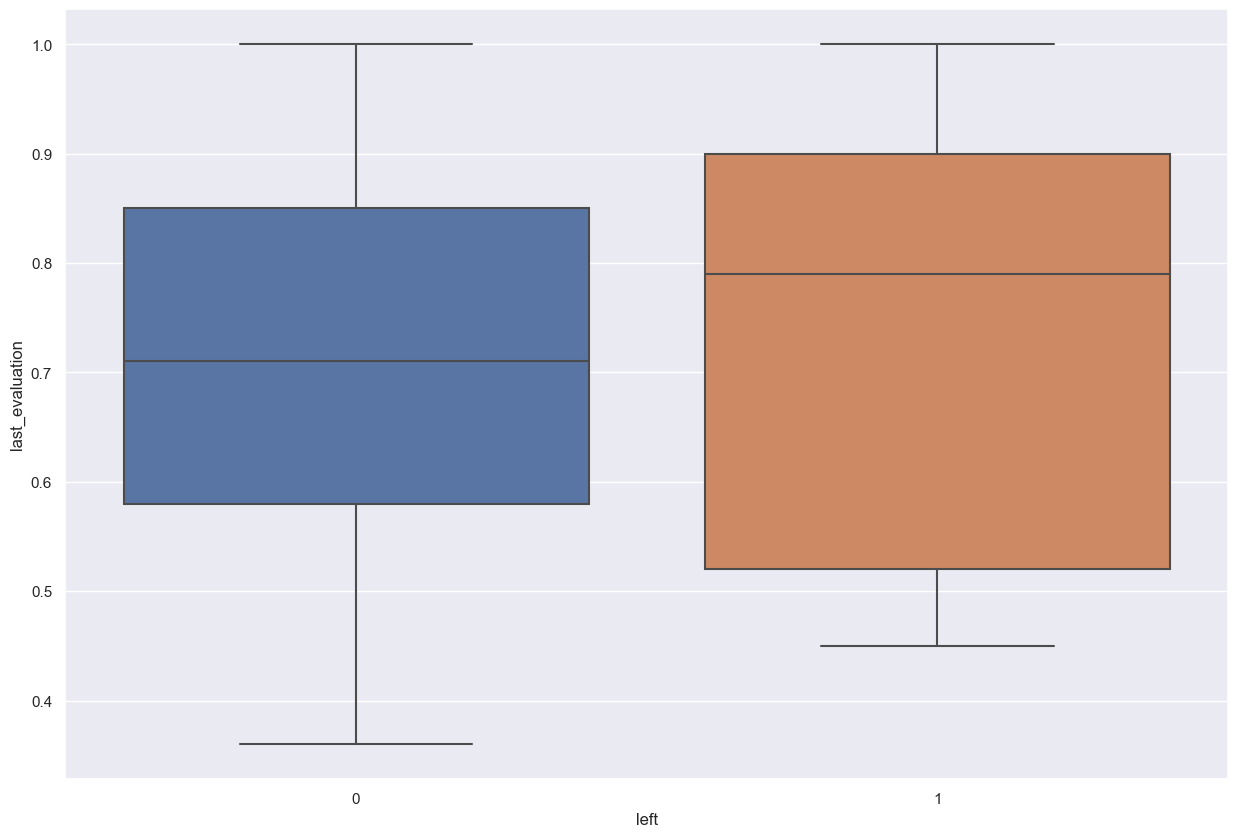

In [45]:
sns.boxplot(x='left', y='last_evaluation', data=df)

- The last_evaluation of retained employees is from 0.6 to 0.85.
- The last_evaluation of left people is from 0.5 to 0.9.

### Feature `average_monthly_hours`

C:\Users\Rachel\AppData\Local\Temp\ipykernel_3472\4008227430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

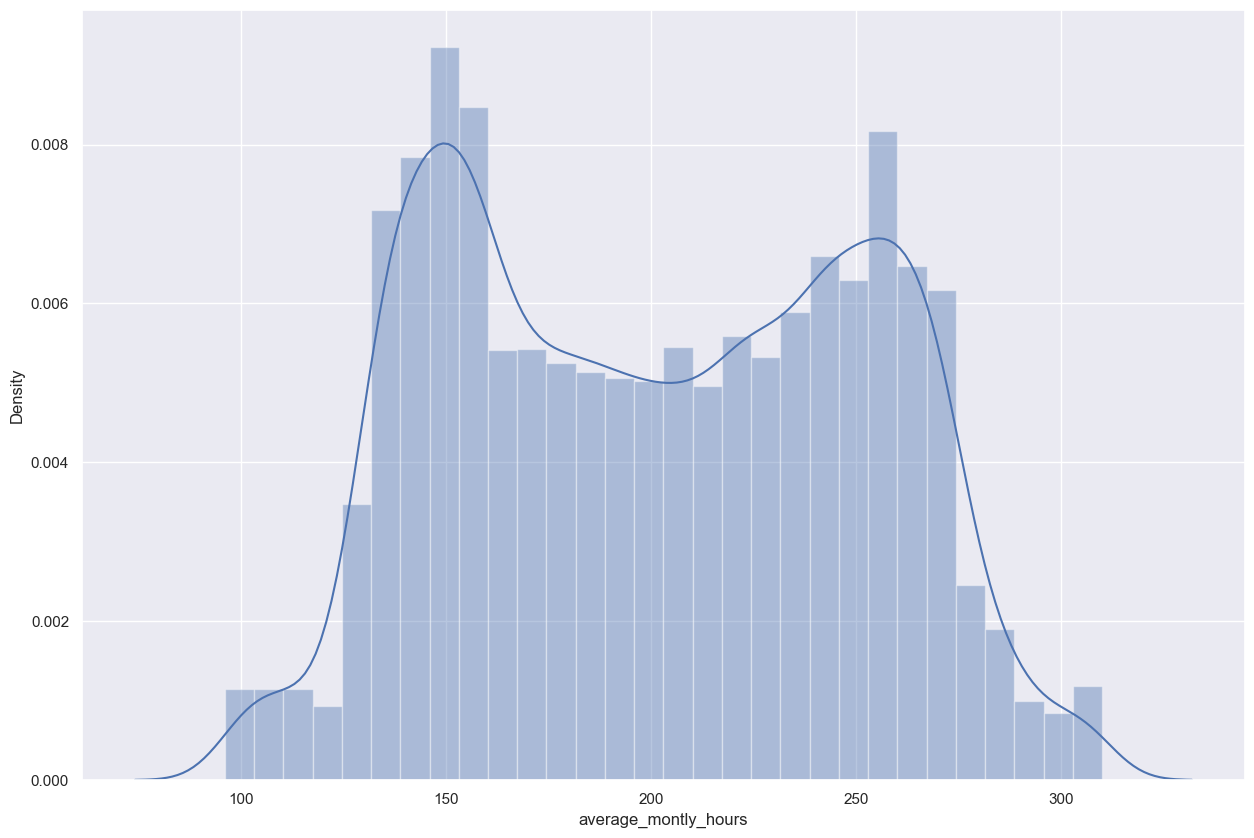

In [48]:
sns.distplot(df['average_montly_hours'])

- The distribution of average_monthly_hours is from 100 to 300 which mostly from 150 to 270.
- The distribution having 2 peaks at 150 and 255.

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

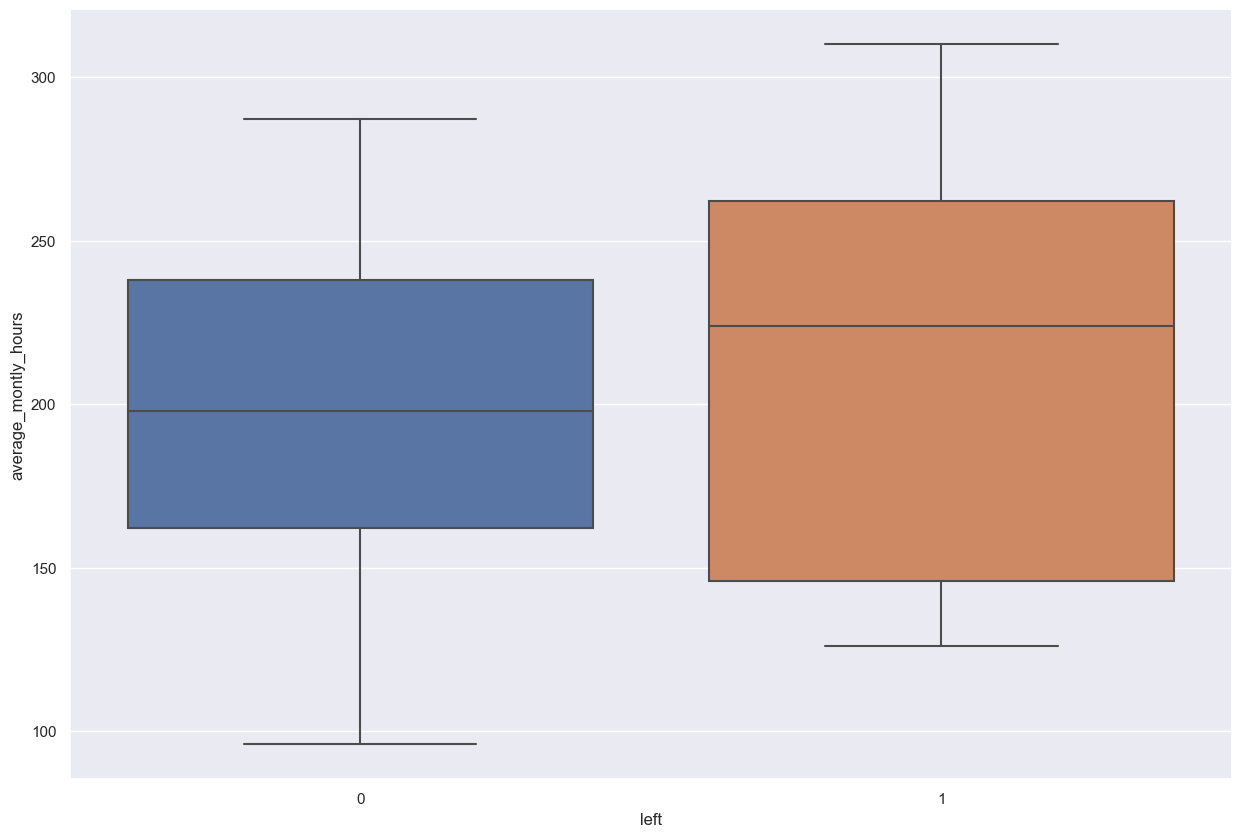

In [49]:
sns.boxplot(x='left', y='average_montly_hours', data=df)

- The average_montly_hours of the stay employees are from 160 to 240 hours.
- The average_montly_hours of the left employees are from 150 to 255 hours.

### Feature `time_spend_company`

C:\Users\Rachel\AppData\Local\Temp\ipykernel_3472\1637010911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

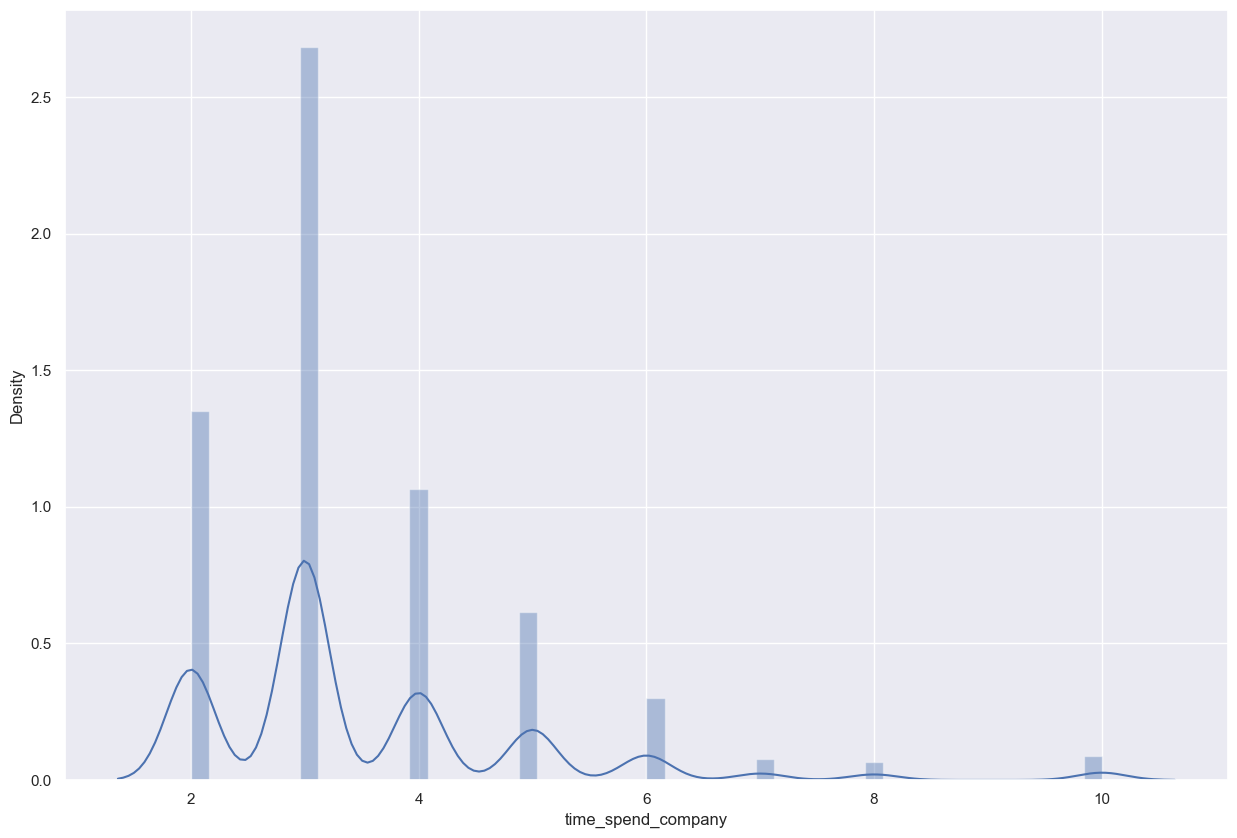

In [50]:
sns.distplot(df['time_spend_company'])

- Time_spend_company distributed from 2 to 10 where it has high count at aroun 3 and almost 0 at 9.

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

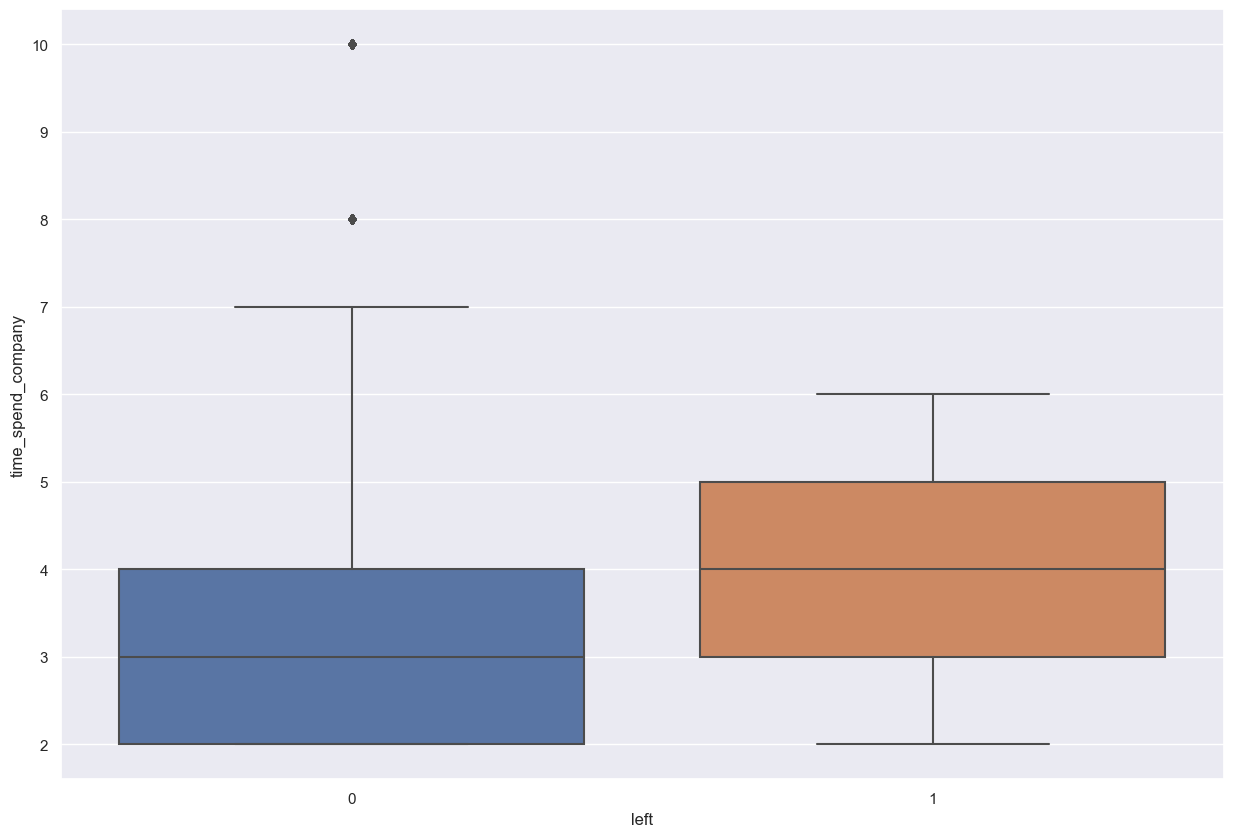

In [51]:
sns.boxplot(x='left', y='time_spend_company', data=df)

- The time_spend_company of the non-left worker are from 2 to 4.
- The time_spend_company of the left people are from 3 to 5.
- The time spend_compnay of the left employee is higher than that of the retained one.

### Checking for correlation

<AxesSubplot:>

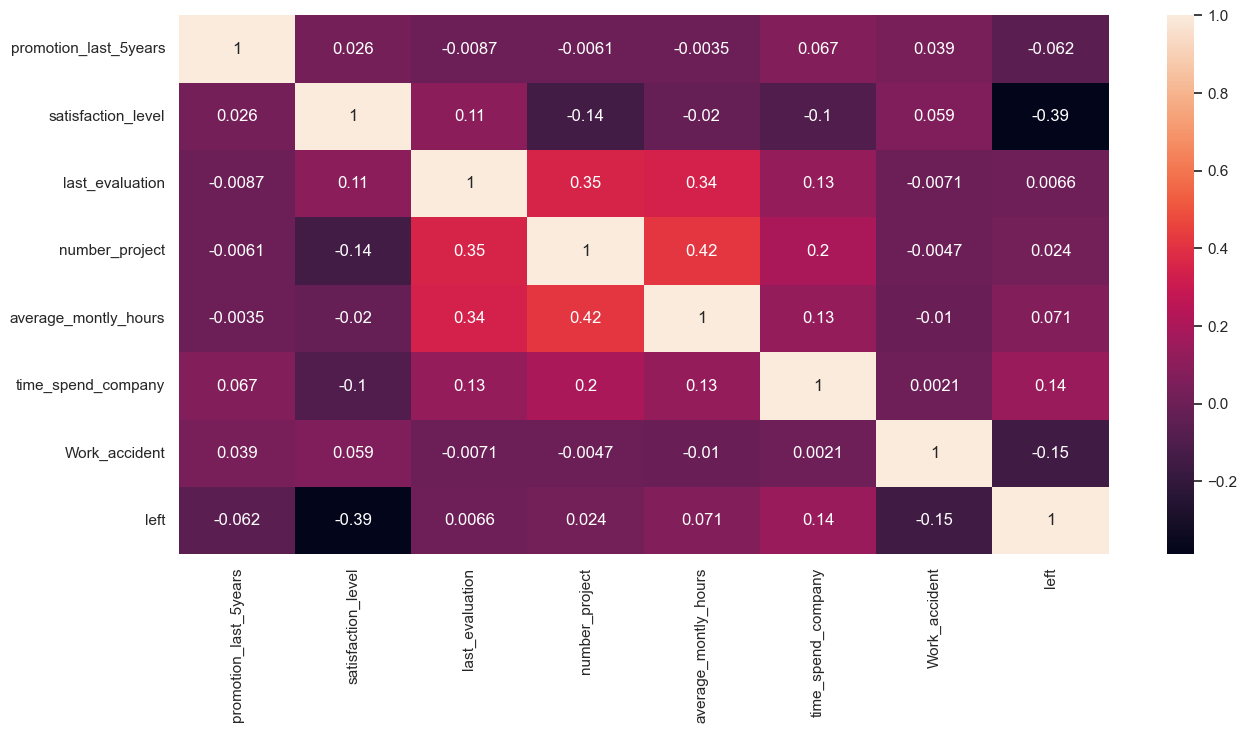

In [57]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)

### Checking for pairplot

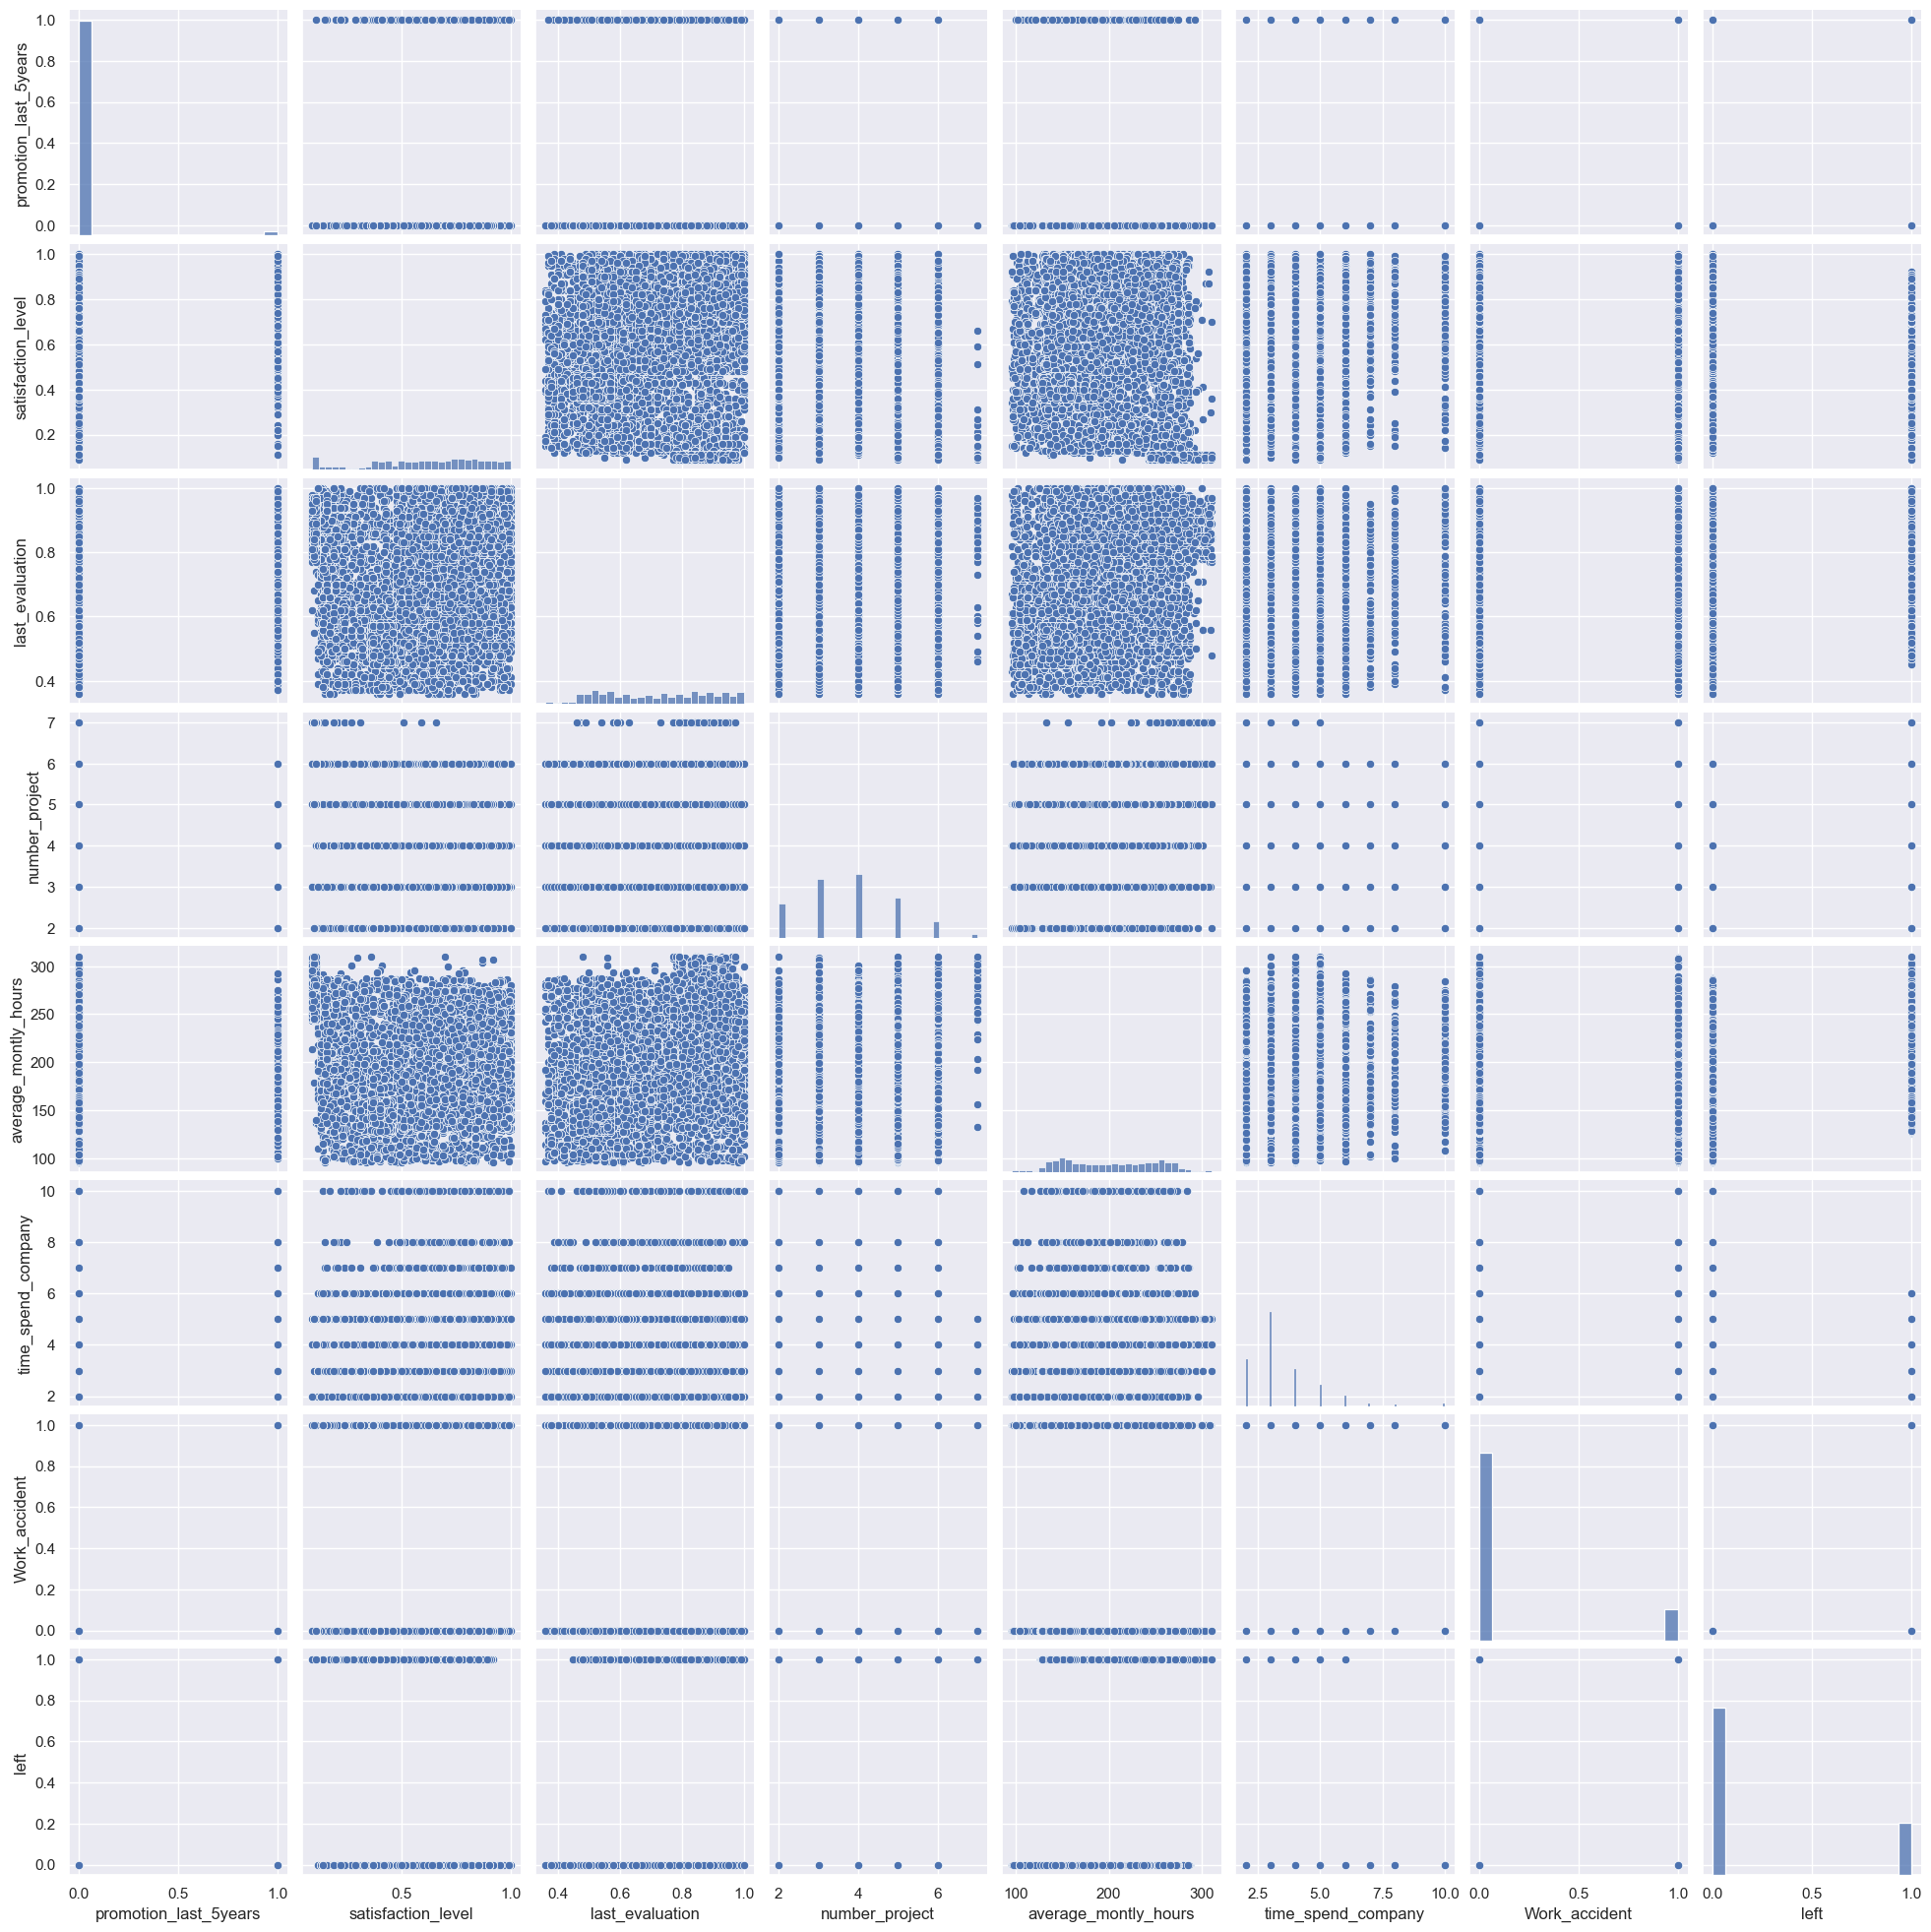

In [58]:
sns.pairplot(df)